## Jordan almond guessing contest
### Experimental Design
* A jar was filled with a known number of almonds and sealed.
* The jar was placed in the coffee nook in the DES office for approximately one week.
* A note was placed with the jar asking people to guess how many almonds were in the jar and to send me their guess.

The law of large numbers (LLN) is an important underpinning of modern statistics. In general, the LLN states that given enough identical and independent measurements, the average measurement will tend towards the true value. One way to think about the LLN in practice is to consider the concept of the "wisdom of the crowd", which stipulates that a group of people will collectively come up with a better estimate of a quantity than a single person.  

#### We can test that idea by answering the question: Will a crowd estimate the number of almonds in the jar better than any single person as the law of large numbers suggests?

We can perform this analysis and try to answer this question in pretty much any statistical package. Below is an example of one route using the python programming language.

In [22]:
%matplotlib inline
import altair as alt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab
from scipy.stats import shapiro, anderson, ttest_1samp, probplot, t
pd.set_option('precision', 0)

#### Load in all of the the guesses into a pandas dataframe for analysis.

In [35]:
filename = 'https://raw.githubusercontent.com/OneGneissGuy/jordan_almond_guess/master/jordan_almonds_count.txt'
data = pd.read_csv(filename, delimiter='\t', index_col=[0])
# inspect dataframe
data.head()

,Count,Running average,Actual value
Guess,,,
1,217,217,212
2,165,191,212
3,222,201,212
4,320,231,212
5,250,235,212


#### View the raw guesses and the running average of the counts.


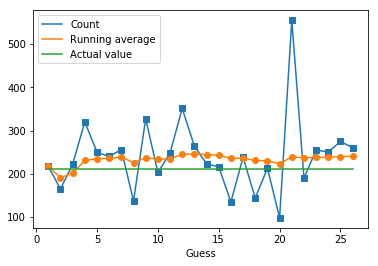

In [66]:
l = data['Count'].plot(marker='s',legend=True)
l = data['Running average'].plot(marker='o',legend=True)
l = data['Actual value'].plot(marker='None',legend=True)

#### Summarize the raw data and identify outliers.

In [4]:
summary_stats = data['Count'].describe()
data_range = summary_stats['max'] -  summary_stats['min']
IQR = summary_stats['75%']- summary_stats['25%']
print("range \t", data_range)
print("IQR \t", IQR)
print("Extreme interval ", summary_stats['25%']-IQR*3, "-", IQR*3+summary_stats['75%'],)
print("Outlier interval ", summary_stats['25%']-IQR*1.5, "-", IQR*1.5+summary_stats['75%'],)
print(summary_stats)

range 	 457.0
IQR 	 53.5
Extreme interval  45.0 - 419.5
Outlier interval  125.25 - 339.25
count     26
mean     240
std       88
min       98
25%      206
50%      239
75%      259
max      555
Name: Count, dtype: float64


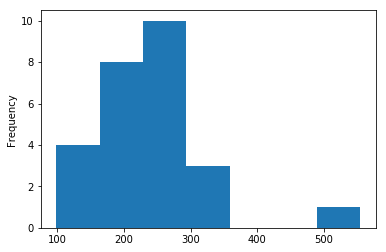

In [62]:
l = data['Count'].plot(kind='hist', bins=7)

Clearly the data is positively skewed (towards the highest guess of 555). Filter out the most extreme value which is easily identified by both *parametric* (+/- 3 x standard deviation) and *non-parametric* methods (>3 * Inter-quartile range +/- 25/75th) and visualize the data again.

In [63]:
filtered_data = data['Count'][data['Count']<data['Count'].max()]
print("Number of samples =", len(filtered_data))
# Describe the filtered dataset 
filtered_data.describe()

Number of samples = 25


count     25
mean     228
std       61
min       98
25%      203
50%      238
75%      256
max      351
Name: Count, dtype: float64

Crowd mean difference = 15.88


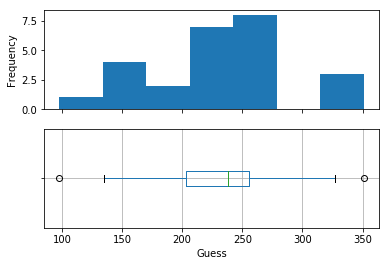

In [61]:
# Visualize the filtered data set
x_f = filtered_data.values
f, ax = plt.subplots(2, 1, sharey=False, sharex=True)
ax[0].hist(filtered_data.values, bins=7)
# generate hist and box plots to graphically inspect the samples distribution for normality
df = pd.DataFrame(data=x_f, columns=[""])
df.boxplot(vert=False, ax=ax[1])
ylab = ax[0].set_ylabel('Frequency')
xlab = ax[1].set_xlabel('Guess')
print("Crowd mean difference =", np.mean(filtered_data-212))

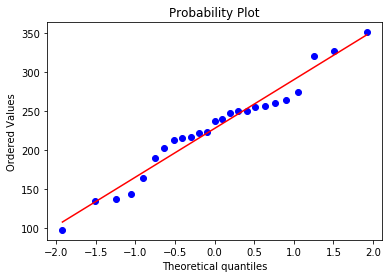

In [17]:
qq = probplot(x_f, dist="norm", plot=pylab)

With the exclusion of the extremely high guess, the average has moved towards the actual value, as one would expect. Visually the distribution is more mound-shaped and symmetrical about the mean and the q-q probability plot shows the data falls along the line, indicating normality of the dataset, even with two outliers remaining. So, vsually, the data appears as if it could have been sampled from a normal population, but is it? Let's run some tests for normality and find out!


### Testing for normality

* Perform the Shapiro-Wilk test for normality, which tests the null hypothesis that the sample (groups guesses) came from a normal distribution. This tests is especially appropriate for small sample sizes, as we have here. Assume significance level of `0.05` or `95%`, unless otherwise noted.

In [18]:
print("Shapiro Wilks test p-value =", shapiro(x_f)[1])

Shapiro Wilks test p-value = 0.5569809079170227


Because the *p*-value > `0.05`, we fail to reject the null hypothesis that the sample distribution was taken from a normal population so parametric methods for hypothesis testing are appropriate.

### Hypothesis testing
Given the small number of guesses (N<30) and the assummption of normality, the one sample t-test can be used to test the null hypothesis that the crowd correctly guessed the actual number of almonds in the jar. The alternative hypothesis is that the crowd did not guess the actual number.
First, we need to calculate the critical values. We can reject the null hypothesis if our test statistic is greater than or less than the critical values.

In [51]:
#lower limit test stat
t.ppf(q=0.025, df=len(x_f-1))

-2.0595385527532946

In [52]:
#upper limit test stat
t.ppf(q=0.975, df=len(x_f-1))

2.059538552753294

In [32]:
ttest_1samp(x_f, 212) # Return t-statistic and p-value

Ttest_1sampResult(statistic=1.3073712930615178, pvalue=0.20347359183227254)

Based on the test statistic and *p*-value we fail reject the null hypothesis that the crowd guessed the correct amount of almonds in the jar and can say that the crowds guess was not significantly different than the actual amount of almonds in the jar.

### Conclusions
Based on the results of the normality tests and the one-sample, two-sided Students t-test, **we can conclude that the crowds guess is not significantly different from the actual amount.**
Therefore this experiment did provide evidence that [Law of Large Numbers](https://en.wikipedia.org/wiki/Law_of_large_numbers), was at work here, even with the paltry sample size; that's pretty cool. 

However, just because a result is statistically signficant, it doesnt mean its practically significant (theres a whole field of stats that handles that, but I won't delve into here). *For example, Elaine was able to guess within one almond of the correct amount, whereas the crowd's mean difference was 15 almonds, so we can't really say the crowd was any wiser than an individual here. This might change if we had 100 or 1000 guesses.*
No experiment is perfect, and often times there are many sources of bias. Lucky for us they dont seem to have played a large role this time.  
I've listed a few sources of bias for your consideration. Thanks again for participating and please reach out if you have any questions or would like to know more.

#### Potential sources of bias

* Non-independence of measurements (participant collusion!)
* Jar shape (tapered neck)
* Location (DES, coffee/microwave nook vs. an entry way)
* Volunteer participation
* Variable almond size and shape
* Measurement technique (random guess vs counting a layer and extrapolating)
* (Hidden) Tissue under the lid
* More?
